In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

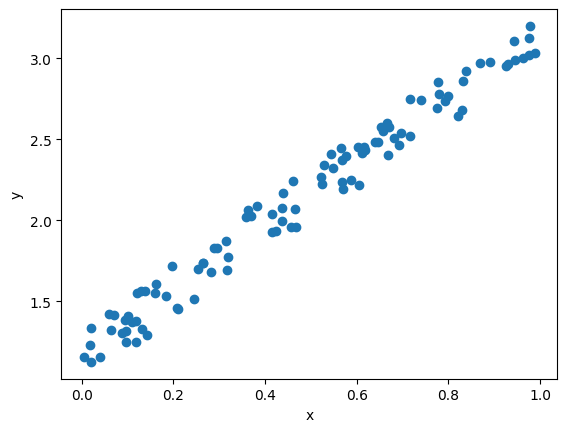

In [ ]:
# generate random linear data with a noise
# the data has only one feature: x

np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 * x.squeeze() + 1 + np.random.rand(100)/3

# create a scatter plot
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x.shape

(100, 1)

In [ ]:
y.shape

(100,)

In [ ]:
def get_mse_error(x, y):
    return np.mean((x-y) ** 2) / 2


get_mse_error(np.array([1, 2, 3]), np.array([2,4,5]))

1.5

In [ ]:
class LRModel():
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def predict(self, x):
        return self.w * x + self.b

In [ ]:
# initialize the model with arbitrary w and b
model = LRModel(5, 2)
model.predict(np.array([1, 2, 3]))

array([ 7, 12, 17])

In [ ]:
def differentiate_mse(x, y, w, b):
    m = x.shape[0]
    y_pred = model.predict(x)
    dw = (1/m) * np.sum(x * (y_pred - y))
    db = 1/m * np.sum(y_pred - y)

    return dw, db

In [ ]:
# running the loop without any parameter update
# in every iteration the model outputs the same prediction
for epoch in range(10):
    y_pred = model.predict(x)
    loss = get_mse_error(y_pred, y)
    print(loss)

3.7200225972869374
3.7200225972869374
3.7200225972869374
3.7200225972869374
3.7200225972869374
3.7200225972869374
3.7200225972869374
3.7200225972869374
3.7200225972869374
3.7200225972869374


In [ ]:
def update_weights(model, loss, learning_rate):
    dw, db = differentiate_mse(x, y, model.w, model.b)
    model.w = model.w - learning_rate * dw
    model.b = model.b - learning_rate * db

    return model

In [ ]:
# running training loop with parameter update
losses = []

for epoch in range(100):
  y_pred = model.predict(x)
  loss = get_mse_error(y_pred, y)
  losses.append(loss)
  print(f"Loss: {loss}, Model.w: {model.w}, Model.b: {model.b}")
  model = update_weights(model, loss, 0.001)

Loss: 3.7200225972869374, Model.w: 5, Model.b: 2
Loss: 3.0435460553729534, Model.w: 4.85242396395514, Model.b: 1.7757645733561702
Loss: 2.5223846165977033, Model.w: 4.719975086895774, Model.b: 1.5809299934468921
Loss: 2.1204459130626723, Model.w: 4.600799437801883, Model.b: 1.4118409728409436
Loss: 1.8100306388181329, Model.w: 4.493272756525383, Model.b: 1.2652954055667396
Loss: 1.5698807156598054, Model.w: 4.3959719847505765, Model.b: 1.1384881902690316
Loss: 1.3836813654467037, Model.w: 4.307650325969452, Model.b: 1.0289620170485887
Loss: 1.238911531225803, Model.w: 4.2272153970153115, Model.b: 0.9345642547669142
Loss: 1.1259616373034702, Model.w: 4.153710087925284, Model.b: 0.8534091826025216
Loss: 1.0374565175595385, Model.w: 4.086295794407421, Model.b: 0.7838449033854912
Loss: 0.9677357993373232, Model.w: 4.0242377288044064, Model.b: 0.7244243583571972
Loss: 0.9124551260078686, Model.w: 3.9668920519035593, Model.b: 0.6738799349426495
Loss: 0.8682801167086535, Model.w: 3.9136945998

In [ ]:
model.w, model.b

(2.055101847918309, 1.0801467914172282)

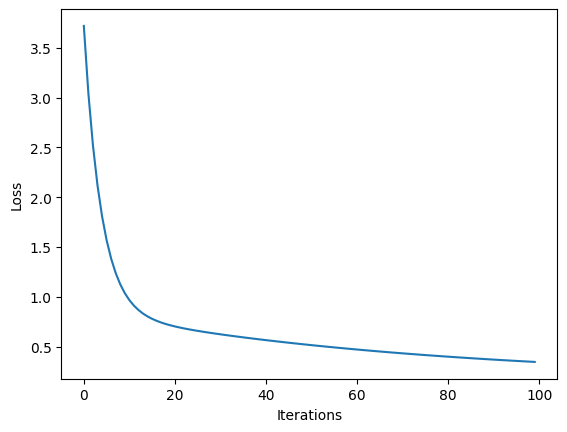

In [ ]:
iterations = np.arange(100)
plt.plot(iterations, losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()